In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [53]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [27]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [28]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [30]:
#?????????????????????????????????????
#engine.execute('SELECT * FROM hawaii LIMIT 5').fetchall()

In [31]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect= True)

In [32]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [33]:
# Save references to each table
Measurement = Base.classes.measurement
Station =Base.classes.station

In [34]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [45]:
for row in session.query(Measurement, Measurement.date).limit(10).all():
    print(row)

(<sqlalchemy.ext.automap.measurement object at 0x0000018642EB8390>, '2010-01-01')
(<sqlalchemy.ext.automap.measurement object at 0x0000018642EB8FD0>, '2010-01-02')
(<sqlalchemy.ext.automap.measurement object at 0x0000018642EDB080>, '2010-01-03')
(<sqlalchemy.ext.automap.measurement object at 0x0000018642EDB0F0>, '2010-01-04')
(<sqlalchemy.ext.automap.measurement object at 0x0000018642EB8E80>, '2010-01-06')
(<sqlalchemy.ext.automap.measurement object at 0x0000018642EDB160>, '2010-01-07')
(<sqlalchemy.ext.automap.measurement object at 0x0000018642EDB1D0>, '2010-01-08')
(<sqlalchemy.ext.automap.measurement object at 0x0000018642EDB240>, '2010-01-09')
(<sqlalchemy.ext.automap.measurement object at 0x0000018642EDB2B0>, '2010-01-10')
(<sqlalchemy.ext.automap.measurement object at 0x0000018642EDB320>, '2010-01-11')


In [63]:
#total number of dates
date_count = session.query(Measurement).group_by(Measurement.date).count()
print(date_count)

2792


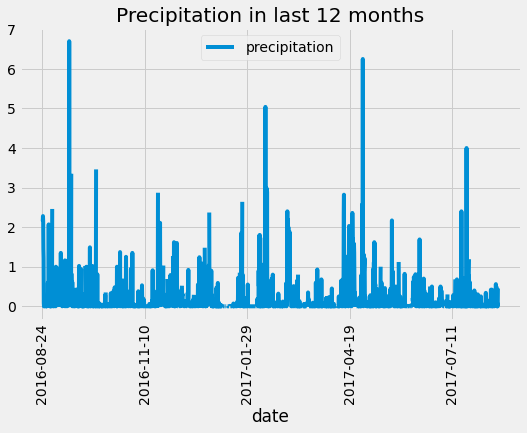

In [78]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
start_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
start_date


# Calculate the date 1 year ago from the last data point in the database
date_year_ago = dt.datetime.strptime(start_date[0], "%Y-%m-%d") - dt.timedelta(days=365)
date_year_ago

# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= date_year_ago).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(query,columns=['date', 'precipitation'])
precipitation_df.set_index('date', inplace=True)


# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by='date',ascending=True)


# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df .plot(title="Precipitation in last 12 months", figsize =(8,5))
plt.legend(loc='upper center')

#how do I get all ticks???????
plt.xticks(rotation=90)
plt.show()





In [61]:
print(start_date)
print(year_ago)

('2017-08-23',)
2016-08-23 00:00:00


In [67]:
precipitation_df


,precipitation
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


In [69]:
precipitation_df
x_axis = precipitation_df["date"]
y_axis = precipitation_df["precipitation"]

KeyError: 'date'

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
